# Homework 2

Introduction: The purpose of this homework will be to identify potential jargon. In order to accomplish this we will employ two small small document corpora. One will be related to news and the other will be from government documents. Your task will be to implement a simple jargon identifier.

In order to accomplish this task you will need to perform several steps. The first relates to identifying the word distributions in the base corpus. We will be using the Reuters news corpus as it is freely available in NLTK. For a jargon corpus we will be making use of DOD OIG reports that we have seen in the past. 

A first step will be to tokenize the documents in both sets. Then, you will try to simply look at the differences in tokens seen. 

But just looking at token differences isn't very sophisticated. We w

Step 1: Get a sample corpus


In [32]:
from nltk.corpus import reuters
# if this fails you might need to ensure that you've downloaded this resource

In [33]:
base_corpus_tokens = []

In [34]:
num_docs = len(reuters.fileids())
#  this has a large number of files... 
# you might wish to limit the number of documents you use while developing your technique 
# ex. reuters.fileids()[0:25]
for doc in reuters.fileids()[0:25]:
    print(doc,reuters.raw(doc))
    doc_text = reuters.open(doc).read()
    # this doc_text variable will give you a text version of the news article. This could be tokenized.


test/14826 ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict would hurt
  them in the long-run, in the short-term Tokyo's loss might be
  their gain.
      The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
      Unofficial Japanese estimates put the impact of the tariffs
  at 10 billion dlrs and spokesmen for major electronics firms
  said they would virtually h

Step 2: Get a potential jargon corpus

In [35]:
import nltk.data
from os import listdir
from os.path import isfile, join
from nltk.util import bigrams 
from nltk.tokenize import TreebankWordTokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import re

dir_base = "/Users/adwoabrako/Documents/Fall 2019/NLP/f19_ds_nlp-master-3/homeworks/homework_2/data/"


####
# Notice: We are reusing code from class notes... remember these kind of building blocks
####

def read_file(filename):
    input_file_text = open(filename , encoding='utf-8').read()
    return input_file_text

    
def read_directory_files(directory):
    file_texts = []
    files = [f for f in listdir(directory) if isfile(join(directory, f))]
    for f in files:
        file_text = read_file(join(directory, f))
        file_texts.append({"file":f, "content": file_text })
    return file_texts
    
jargon_corpus = read_directory_files(dir_base)
print(jargon_corpus)


[{'file': 'development-review-and-validation-of-the-philippines-operations-support-contrac', 'content': '\n\n\nJune 5, 2018  —\n\n\n\nObjective:\nWe determined whether U.S. Pacific Command (USPACOM) and subordinate commands developed, reviewed, and validated requirements for the Philippines Operations Support Contract (POSC) III to ensure the adequate provision of services.\nBackground:\nOn February 23, 2017, Naval Facilities Engineering Command Pacific awarded the POSC III. This contract is a cost-plus-incentive-fee contract with a maximum dollar value of $58 million, including the base year and four option periods with a 6‑month extension, to provide base operating support services. \nIn September 2017, the Secretary of Defense designated Operation Pacific Eagle‑Philippines as a contingency operation. USPACOM, in coordination with other DoD elements, government agencies, and partner nations, executes this contingency operation as a counterterrorism campaign supporting the Republic of

In [36]:
## Convert jargon_corpus to string

jargon_corpus = str(jargon_corpus)
type(jargon_corpus)

str

In [37]:
# perhaps you could store tokens from the jargon corpus here

jargon_tokens = [TreebankWordTokenizer().tokenize(jargon_corpus)]
jargon_tokens = word_tokenize(jargon_corpus)
print(jargon_tokens)


['[', '{', "'file", "'", ':', "'development-review-and-validation-of-the-philippines-operations-support-contrac", "'", ',', "'content", "'", ':', "'\\n\\n\\nJune", '5', ',', '2018', '—\\n\\n\\n\\nObjective', ':', '\\nWe', 'determined', 'whether', 'U.S.', 'Pacific', 'Command', '(', 'USPACOM', ')', 'and', 'subordinate', 'commands', 'developed', ',', 'reviewed', ',', 'and', 'validated', 'requirements', 'for', 'the', 'Philippines', 'Operations', 'Support', 'Contract', '(', 'POSC', ')', 'III', 'to', 'ensure', 'the', 'adequate', 'provision', 'of', 'services.\\nBackground', ':', '\\nOn', 'February', '23', ',', '2017', ',', 'Naval', 'Facilities', 'Engineering', 'Command', 'Pacific', 'awarded', 'the', 'POSC', 'III', '.', 'This', 'contract', 'is', 'a', 'cost-plus-incentive-fee', 'contract', 'with', 'a', 'maximum', 'dollar', 'value', 'of', '$', '58', 'million', ',', 'including', 'the', 'base', 'year', 'and', 'four', 'option', 'periods', 'with', 'a', '6‑month', 'extension', ',', 'to', 'provide', '

In [38]:
base_corpus_tokens = str(base_corpus_tokens)
type(base_corpus_tokens)

str

In [39]:
## Tokens from base corpus

base_corpus_tokens = [TreebankWordTokenizer().tokenize(doc_text)]
print(base_corpus_tokens)

[['VIEILLE', 'MONTAGNE', 'SAYS', '1986', 'CONDITIONS', 'UNFAVOURABLE', 'A', 'sharp', 'fall', 'in', 'the', 'dollar', 'price', 'of', 'zinc', 'and', 'the', 'depreciation', 'of', 'the', 'U.S.', 'Currency', 'created', 'unfavourable', 'economic', 'conditions', 'for', 'Vieille', 'Montagne', 'SA', '&', 'lt', ';', 'VMNB.BR', '>', 'in', '1986.', 'It', 'said', 'in', 'a', 'statement', 'that', 'the', 'two', 'factors', 'led', 'to', 'a', 'squeeze', 'on', 'refining', 'margins', 'and', 'an', '18.24', 'pct', 'fall', 'in', 'sales', 'and', 'services', 'income', 'despite', 'an', 'unchanged', 'level', 'of', 'activity.', 'Vieille', 'Montagne', ',', 'which', 'is', 'actively', 'pursuing', 'a', 'restructuring', 'program', ',', 'reported', 'a', '198', 'mln', 'franc', 'net', 'loss', ',', 'after', '187', 'mln', 'francs', 'in', 'provisions', 'for', 'the', 'closure', 'of', 'an', 'electrolysis', 'plant', ',', 'compared', 'with', 'a', '250', 'mln', 'franc', 'net', 'profit', 'in', '1985', '.']]


In [40]:
jargon_tokens = str(jargon_tokens)
type(jargon_tokens)

str

In [41]:
## Removing stopwords from jargon_tokens

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


In [42]:
filtered_tokens = [word for word in jargon_tokens.split() if word not in stop_words]
print(filtered_tokens)

["['[',", "'{',", '"\'file",', '"\'",', "':',", '"\'development-review-and-validation-of-the-philippines-operations-support-contrac",', '"\'",', "',',", '"\'content",', '"\'",', "':',", '"\'\\\\n\\\\n\\\\nJune",', "'5',", "',',", "'2018',", "'—\\\\n\\\\n\\\\n\\\\nObjective',", "':',", "'\\\\nWe',", "'determined',", "'whether',", "'U.S.',", "'Pacific',", "'Command',", "'(',", "'USPACOM',", "')',", "'and',", "'subordinate',", "'commands',", "'developed',", "',',", "'reviewed',", "',',", "'and',", "'validated',", "'requirements',", "'for',", "'the',", "'Philippines',", "'Operations',", "'Support',", "'Contract',", "'(',", "'POSC',", "')',", "'III',", "'to',", "'ensure',", "'the',", "'adequate',", "'provision',", "'of',", "'services.\\\\nBackground',", "':',", "'\\\\nOn',", "'February',", "'23',", "',',", "'2017',", "',',", "'Naval',", "'Facilities',", "'Engineering',", "'Command',", "'Pacific',", "'awarded',", "'the',", "'POSC',", "'III',", "'.',", "'This',", "'contract',", "'is',", "'a',

In [43]:
# Here you might try to identify relevant tokens from the jargon corpus

import re
    
matches_1 = re.findall(r'[A-Z\s]+', jargon_tokens)
matches_2 = re.findall('([a-zA-Z0-9]*-[a-zA-Z0-9]*)+', jargon_tokens)
matches_3 = re.findall('([a-zA-Z0-9]*-[a-zA-Z0-9]*-[a-zA-Z0-9]*-[a-zA-Z0-9]*)+', jargon_tokens)
matches_4 = re.findall('[A-Z]+[a-z]+[A-Z]+', jargon_tokens)
matches_5 = re.findall('([a-zA-Z0-9]*/[a-zA-Z0-9]*/[a-zA-Z0-9]*)+', jargon_tokens)

jargon_corpus = str(matches_1 + matches_2 + matches_3 + matches_4 + matches_5)

for item in jargon_corpus:
    print(item,sep='', end='')

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'J', ' ', ' ', ' ', ' ', 'O', ' ', ' ', 'W', ' ', ' ', ' ', 'U', 'S', ' ', 'P', ' ', 'C', ' ', ' ', 'USPACOM', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'P', ' ', 'O', ' ', 'S', ' ', 'C', ' ', ' ', 'POSC', ' ', ' ', 'III', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'B', ' ', ' ', 'O', ' ', 'F', ' ', ' ', ' ', ' ', ' ', 'N', ' ', 'F', ' ', 'E', ' ', 'C', ' ', 'P', ' ', ' ', ' ', 'POSC', ' ', 'III', ' ', ' ', 'T', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'I', ' ', 'S', ' ', ' ', ' ', ' ', 'S', ' ', ' ', 'D', ' ', ' ', 'O', ' ', 'P', ' ', 'E', 'P', ' ', ' ', ' ', ' ', ' ', ' ', 'USPACOM', ' ', ' ', ' ', ' ', ' ', ' ', 'D', 'D', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'R', ' ', ' ', ' ', 'P', ' ', ' ', 'I', ' ', ' ', ' 

Step 3: Identify words unique to the jargon corpus

In [44]:
jargon_tokens = str(jargon_tokens)
jargon_tokens = nltk.tokenize.word_tokenize(jargon_tokens)


In [45]:
# if you have two sets of tokens, you could attempt to simply 
# identify what the difference of membership between the two sets might be.
real_jargon = set(jargon_tokens) # how might you compare this to your list of tokens above to identify distinct elements
real_jargon

{"'Deviation—Determination",
 "'Diagnostics",
 "'where",
 "'Director.\\\\xa0",
 "'Operations",
 "'implementation.\\\\n",
 "'exist",
 "'decision",
 "'requirements.\\\\nAs",
 "'security",
 "'manage",
 "'114-577",
 '5',
 "'EPAWSS",
 "'modified",
 "'use",
 "'DLA",
 "'Resources",
 "'Special",
 "'grown",
 "'violations.\\\\nManagement",
 "'funds.\\\\n4\\\\xa0We",
 "'implementing",
 "'focused",
 "'authority",
 "'identify",
 "'for.\\\\xa0",
 "'approximately",
 "'guidebook",
 "'Officer",
 "'establish",
 "'co-locating",
 ',',
 "'13",
 "'non-U.S.-manufactured",
 "'form.\\\\nDuring",
 "'contracts.\\\\nFindings\\\\nDLA",
 "'enter",
 "'disagreed",
 "'ensuring",
 "'Land",
 "'Federal",
 "'tests",
 "'program",
 "'compliance",
 "'\\\\n•",
 "'soliciting",
 "'Management",
 "'vulnerabilities",
 "'problems",
 "'directives",
 "'\\\\n\\\\n\\\\ninitiate",
 "'draft",
 "'revised",
 "'\\\\n\\\\nappoint",
 "'faster",
 "'changed",
 "'historical",
 "'House",
 "'web",
 "'Framework",
 "'if",
 "'networks",
 "'discount",

In [46]:
# Here you might want to look at the real jargon list and see if it looks right to you

In [47]:
base_corpus_tokens = str(base_corpus_tokens)
jargon_tokens = str(jargon_tokens)

Step 4: Refine differences in corpora using frequency information

In [48]:
## Tokenizing base_corpus_tokens before finding frequency distribution

base_corpus_words = nltk.tokenize.word_tokenize(base_corpus_tokens)
base_corpus_words

['[',
 '[',
 "'VIEILLE",
 "'",
 ',',
 "'MONTAGNE",
 "'",
 ',',
 "'SAYS",
 "'",
 ',',
 "'1986",
 "'",
 ',',
 "'CONDITIONS",
 "'",
 ',',
 "'UNFAVOURABLE",
 "'",
 ',',
 "'",
 'A',
 "'",
 ',',
 "'sharp",
 "'",
 ',',
 "'fall",
 "'",
 ',',
 "'in",
 "'",
 ',',
 "'the",
 "'",
 ',',
 "'dollar",
 "'",
 ',',
 "'price",
 "'",
 ',',
 "'of",
 "'",
 ',',
 "'zinc",
 "'",
 ',',
 "'and",
 "'",
 ',',
 "'the",
 "'",
 ',',
 "'depreciation",
 "'",
 ',',
 "'of",
 "'",
 ',',
 "'the",
 "'",
 ',',
 "'",
 'U.S',
 '.',
 "'",
 ',',
 "'Currency",
 "'",
 ',',
 "'created",
 "'",
 ',',
 "'unfavourable",
 "'",
 ',',
 "'economic",
 "'",
 ',',
 "'conditions",
 "'",
 ',',
 "'for",
 "'",
 ',',
 "'Vieille",
 "'",
 ',',
 "'Montagne",
 "'",
 ',',
 "'SA",
 "'",
 ',',
 "'",
 '&',
 "'",
 ',',
 "'lt",
 "'",
 ',',
 "'",
 ';',
 "'",
 ',',
 "'VMNB.BR",
 "'",
 ',',
 "'",
 '>',
 "'",
 ',',
 "'in",
 "'",
 ',',
 "'1986",
 '.',
 "'",
 ',',
 "'It",
 "'",
 ',',
 "'said",
 "'",
 ',',
 "'in",
 "'",
 ',',
 "'",
 'a',
 "'",
 ',',
 "'statement"

In [49]:
## Tokenizing jargon_tokens before finding frequency distribution

jargon_words = nltk.tokenize.word_tokenize(jargon_corpus)
jargon_words

['[',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 'J',
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 'O',
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 'W',
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 'U',
 "'",
 ',',
 "'S",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 'P',
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 'C',
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'USPACOM",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 'P',
 "'",
 ',',
 "'",
 "'",
 ',',
 "'",
 'O',
 "'",
 ',',
 "'",
 "'",
 ',',
 "'S",
 "'",
 ',',
 "'",
 "'",
 ',',
 

In [50]:
# first we will get the token frequency distribution from the corpora
freq_jargon = nltk.FreqDist(jargon_words)    ## frequency distribution of jargon_corpus


freq_base_tokens = nltk.FreqDist(base_corpus_words)    ## frequency distribution of base_corpus_tokens

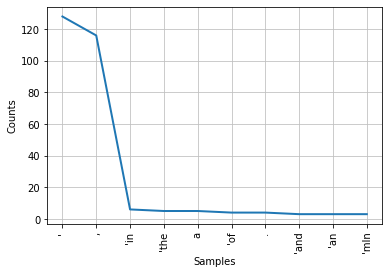

In [51]:
# plot to see what is going on
freq_base_tokens.plot(10)

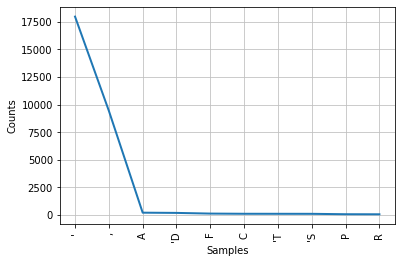

In [52]:
freq_jargon.plot(10)

In [53]:
# now, what are the most common tokens from the jargon corpus?
freq_jargon.most_common(20)

[("'", 17972),
 (',', 9434),
 ('A', 199),
 ("'D", 179),
 ('F', 117),
 ('C', 100),
 ("'T", 98),
 ("'S", 95),
 ('P', 59),
 ('R', 53),
 ('O', 52),
 ('B', 47),
 ('W', 44),
 ("'M", 41),
 ('I', 39),
 ("'DCMA", 37),
 ("'DoD", 33),
 ("'DLA", 32),
 ("'SRRB", 27),
 ('U', 26)]

In [54]:
## Most common tokens from base corpus
freq_base_tokens.most_common(30) 

[("'", 128),
 (',', 116),
 ("'in", 6),
 ("'the", 5),
 ('a', 5),
 ("'of", 4),
 ('.', 4),
 ("'and", 3),
 ("'an", 3),
 ("'mln", 3),
 ('[', 2),
 ("'1986", 2),
 ("'fall", 2),
 ("'for", 2),
 ("'Vieille", 2),
 ("'Montagne", 2),
 ("'franc", 2),
 ("'net", 2),
 (']', 2),
 ("'VIEILLE", 1),
 ("'MONTAGNE", 1),
 ("'SAYS", 1),
 ("'CONDITIONS", 1),
 ("'UNFAVOURABLE", 1),
 ('A', 1),
 ("'sharp", 1),
 ("'dollar", 1),
 ("'price", 1),
 ("'zinc", 1),
 ("'depreciation", 1)]

In [55]:

# you might also wish to calculate a probability distribution for the tokens. 
# you could use either the maximum likelihood estimator or the smoothed distribution
# so you need to set those distributions here (we discussed in class)


In [56]:
from nltk.probability import MLEProbDist
from nltk.util import ngrams 

high_probability_jargon = []
for sentence in jargon_corpus:
    sequence = word_tokenize(sentence) 
    high_probability_jargon.extend(list(ngrams(sequence, 2)))
    
if sentence in base_corpus_tokens:
    sequence = word_tokenize(sentence) 
    high_probability_jargon.extend(list(ngrams(sequence, 2)))

freq_dist = nltk.FreqDist(jargon_corpus)
prob_dist = nltk.MLEProbDist(freq_dist)


freq_dist1 = nltk.FreqDist(base_corpus_tokens)
prob_dist1 = nltk.MLEProbDist(freq_dist1)

In [57]:
print(prob_dist)   ## probability distribution for jargon_corpus
print()
print(prob_dist1)  ## probability distribution for base_corpus_tokens

<MLEProbDist based on 49373 samples>

<MLEProbDist based on 975 samples>


# Analysis of Results

Below this cell, please put a short writeup of your approach and comments on your results. The goal here is to explain how well you think your method worked based on looking at some of your output data. Additionally, please describe things you might do differently or ways in which you might improve the process if you were given more time.

In [58]:
## In order to tokenize jargon_corpus, I had to convert it from a list to string and saved the tokenized corpus
# in jargon_tokens. I also converted base_corpus_tokens from a list to string, before tokenizimg it.

## Next, I imported 'stopwords' and attempted to remove the stopwords in jargon_tokens. The output still has 
# stopwords and given more time, I would be able to restructure the code to ensure that all stopwords are ommitted.

## I then went on to identify the jargons in the corpus and printed this out. The code seems to work to some extent,
# and given more time, I would restructure the code to take out the (single)capital letters, as they're not ideal for the output.

## I (word) tokenized jargon_corpus and base_corpus_tokens in order to identify the real_tokens and 
# before plotting frequency distribution.

## The next was to find the probability distribution for the tokens (jargon_corpus and base_corpus_tokens).
# The Maximum Likelihood Estimator (MLE) was used to find the probability distribution.

## The last part was to handle bigrams for base_corpus_tokens and jargon_words.

## In conclusion, I believe the method used worked to some extent and there is more room for improvement 
# for identifying the real jargons, for better frequency distribution and also for handling bigrams.


# Extra Credit

1. Modify your code to handle bigrams (it's pretty simple if you think about it)
2. Consider how you might filter out words that are jargon specific, but are reference to real items. That is, filter out words that include some combination of numbers and characters
3. Try to build a method to determine the probability of sentences coming from either the jargon corpus or the base corpus.


In [59]:
## Bigram list for base_corpus_tokens

bigram = list(nltk.bigrams(base_corpus_words))
bigram[:10]

[('[', '['),
 ('[', "'VIEILLE"),
 ("'VIEILLE", "'"),
 ("'", ','),
 (',', "'MONTAGNE"),
 ("'MONTAGNE", "'"),
 ("'", ','),
 (',', "'SAYS"),
 ("'SAYS", "'"),
 ("'", ',')]

In [60]:
## Bigram count for base_corpus_tokens

bigramCount={}
for t in sorted(set(bigram)):
    bigramCount[t]=bigram.count(t)
sortedBigram = sorted(bigramCount.items(), key=lambda x: x[1], reverse=True)
sortedBigram[:20]

[(("'", ','), 116),
 ((',', "'"), 19),
 (("'in", "'"), 6),
 ((',', "'in"), 6),
 (("'", 'a'), 5),
 (("'the", "'"), 5),
 ((',', "'the"), 5),
 (('a', "'"), 5),
 (("'of", "'"), 4),
 ((',', "'of"), 4),
 (('.', "'"), 4),
 (("'an", "'"), 3),
 (("'and", "'"), 3),
 (("'mln", "'"), 3),
 ((',', "'an"), 3),
 ((',', "'and"), 3),
 ((',', "'mln"), 3),
 (("'Montagne", "'"), 2),
 (("'Vieille", "'"), 2),
 (("'fall", "'"), 2)]

In [61]:
## Bigram list for jargon_words  

bigram_1 = list(nltk.bigrams(jargon_words))

## Bigram count for jargon_words  
bigramCount_1={}
for t in sorted(set(bigram_1)):
    bigramCount_1[t]=bigram_1.count(t)
sortedBigram_1 = sorted(bigramCount_1.items(), key=lambda x: x[1], reverse=True)
sortedBigram_1[:50]

[(("'", ','), 9434),
 ((',', "'"), 8536),
 (("'", "'"), 7668),
 (("'", 'A'), 199),
 (('A', "'"), 199),
 (("'D", "'"), 179),
 ((',', "'D"), 179),
 (("'", 'F'), 117),
 (('F', "'"), 117),
 (("'", 'C'), 100),
 (('C', "'"), 100),
 (("'T", "'"), 98),
 ((',', "'T"), 98),
 (("'S", "'"), 95),
 ((',', "'S"), 95),
 (("'", 'P'), 59),
 (('P', "'"), 59),
 (("'", 'R'), 53),
 (('R', "'"), 53),
 (("'", 'O'), 52),
 (('O', "'"), 52),
 (("'", 'B'), 47),
 (('B', "'"), 47),
 (("'", 'W'), 44),
 (('W', "'"), 44),
 (("'M", "'"), 41),
 ((',', "'M"), 41),
 (("'", 'I'), 39),
 (('I', "'"), 39),
 (("'DCMA", "'"), 37),
 ((',', "'DCMA"), 37),
 (("'DoD", "'"), 33),
 ((',', "'DoD"), 33),
 (("'DLA", "'"), 32),
 ((',', "'DLA"), 32),
 (("'SRRB", "'"), 27),
 ((',', "'SRRB"), 27),
 (("'", 'U'), 26),
 (('U', "'"), 26),
 (("'EPAWSS", "'"), 25),
 ((',', "'EPAWSS"), 25),
 (("'USPACOM", "'"), 23),
 ((',', "'USPACOM"), 23),
 (("'", 'L'), 21),
 (("'DCS", "'"), 21),
 ((',', "'DCS"), 21),
 (('L', "'"), 21),
 (("'", 'H'), 18),
 (('H'